In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
committees_df = pd.read_csv('analyst_csvs/committees.csv')

def pie_plot_viz(title, data):
    assert title != None or title != ""
    # Plot the pie chart with the filtered data
    plt.figure(figsize=(8, 8))
    data.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(title)
    plt.ylabel('')  
    plt.show()


# comittee_id = {congress_type, committee_name}
# ex. ABCD = {senate, technology}
comittees_dict = {}
for comittees in committees_df.values:
    # deconstructing 
    committee_id, congress_type, committee_name = comittees
    comittees_dict[committee_id] = (congress_type, committee_name)




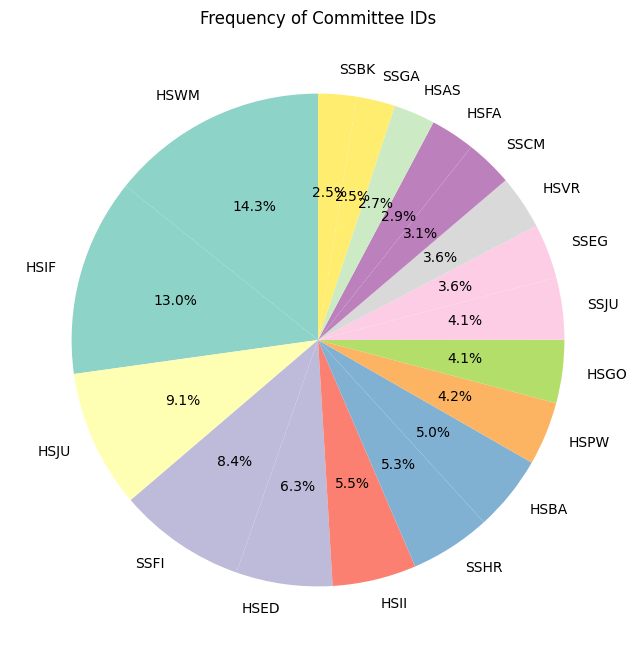

In [21]:
# Frequency of Comittee IDs

bills_committees_df = pd.read_csv('analyst_csvs/bills_committees.csv')

committee_frequency = bills_committees_df['committee_id'].value_counts()
# filter out committees with x < 2%
committee_frequency_filtered = committee_frequency[committee_frequency / committee_frequency.sum() >= 0.02]
pie_plot_viz('Frequency of Committee IDs', committee_frequency_filtered)


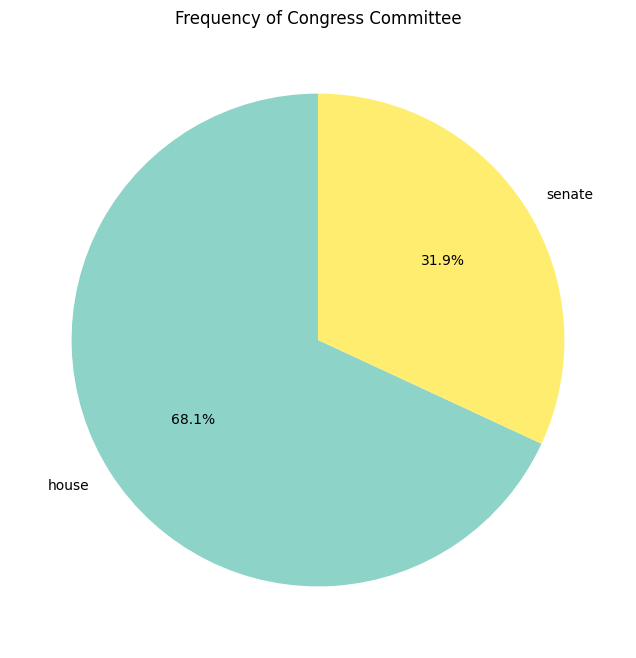

In [22]:
bills_committees_df = pd.read_csv('analyst_csvs/bills_committees.csv')

for index, bills_committee in bills_committees_df.iterrows():
    # convert from comittee_id to comittee name 
    committee_id, bill_id = bills_committee['committee_id'], bills_committee['bill_id']
    assert committee_id != "" or committee_id != None
    assert bill_id != "" or bill_id != None
    
    congress_type, comittee_name = comittees_dict[committee_id]
    
    assert congress_type != "" or congress_type != None
    assert committee_name != "" or committee_name != None

    bills_committees_df.at[index, 'committee_id'] = congress_type


congress_frequency = bills_committees_df['committee_id'].value_counts()
# filter out committees with x < 2%
congress_frequency_filtered = congress_frequency[congress_frequency / congress_frequency.sum() >= 0.02]
# visualize w/ pie chart 
pie_plot_viz('Frequency of Congress Committee', congress_frequency_filtered)


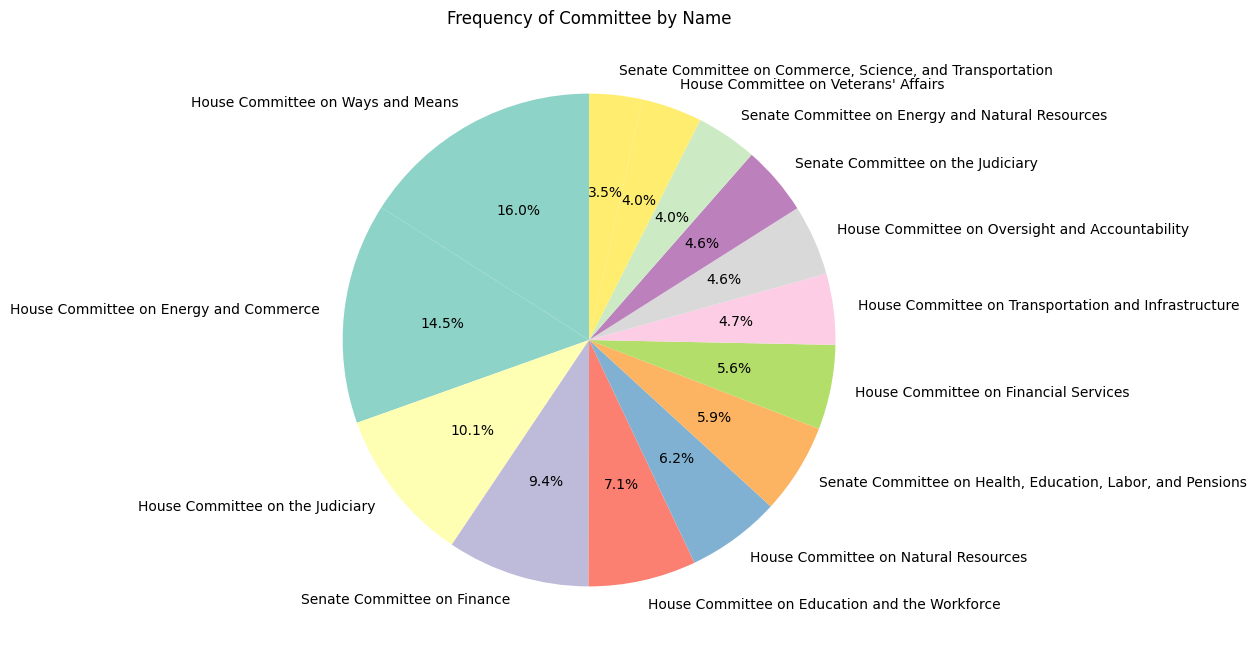

In [23]:
bills_committees_df = pd.read_csv('analyst_csvs/bills_committees.csv')

for index, bills_committee in bills_committees_df.iterrows():
    # convert from comittee_id to comittee name 
    committee_id, bill_id = bills_committee['committee_id'], bills_committee['bill_id']
    assert committee_id != "" or committee_id != None
    assert bill_id != "" or bill_id != None
    
    congress_type, comittee_name = comittees_dict[committee_id]
    
    assert congress_type != "" or congress_type != None
    assert committee_name != "" or committee_name != None

    bills_committees_df.at[index, 'committee_id'] = comittee_name

comittee_name_frequency = bills_committees_df['committee_id'].value_counts()
# filter out committees with x<2% 
comittee_name_frequency_filtered = comittee_name_frequency[comittee_name_frequency / comittee_name_frequency.sum() >= 0.025] 

pie_plot_viz('Frequency of Committee by Name', comittee_name_frequency_filtered)


In [24]:
bills_df = pd.read_csv('analyst_csvs/bills.csv')
bills_committees_df = pd.read_csv('analyst_csvs/bills_committees.csv')


committee_frequency_filtered = committee_frequency[committee_frequency / committee_frequency.sum() >= 0.04]

# most frequent comittee ids 
committee_ids = committee_frequency_filtered.index.tolist()

# create a dictionary where the keys are the most frequent comittee ids
committee_id_bill_ids = {committee_id: [] for committee_id in committee_ids}

# add the bill_id to dictionary value
for committee_id, bill_id in bills_committees_df.values:  

    assert committee_id != None or committee_id != ""
    assert bill_id != None or bill_id != ""

    if committee_id_bill_ids.get(committee_id) is not None: 
        committee_id_bill_ids.setdefault(committee_id, []).append(bill_id)

In [27]:
# Plot the frequencies with congress types on the X-axis
def viz_multi_bar_plot(data):
    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot(kind="bar", stacked=True, ax=ax, colormap='Set2')

    # Label the chart
    ax.set_title("Frequency of Bills of Most 'Important' Committees")
    ax.set_xlabel("Congress")
    ax.set_ylabel("Frequency of Bills")
    ax.set_xticklabels(df_pivoted.index, rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

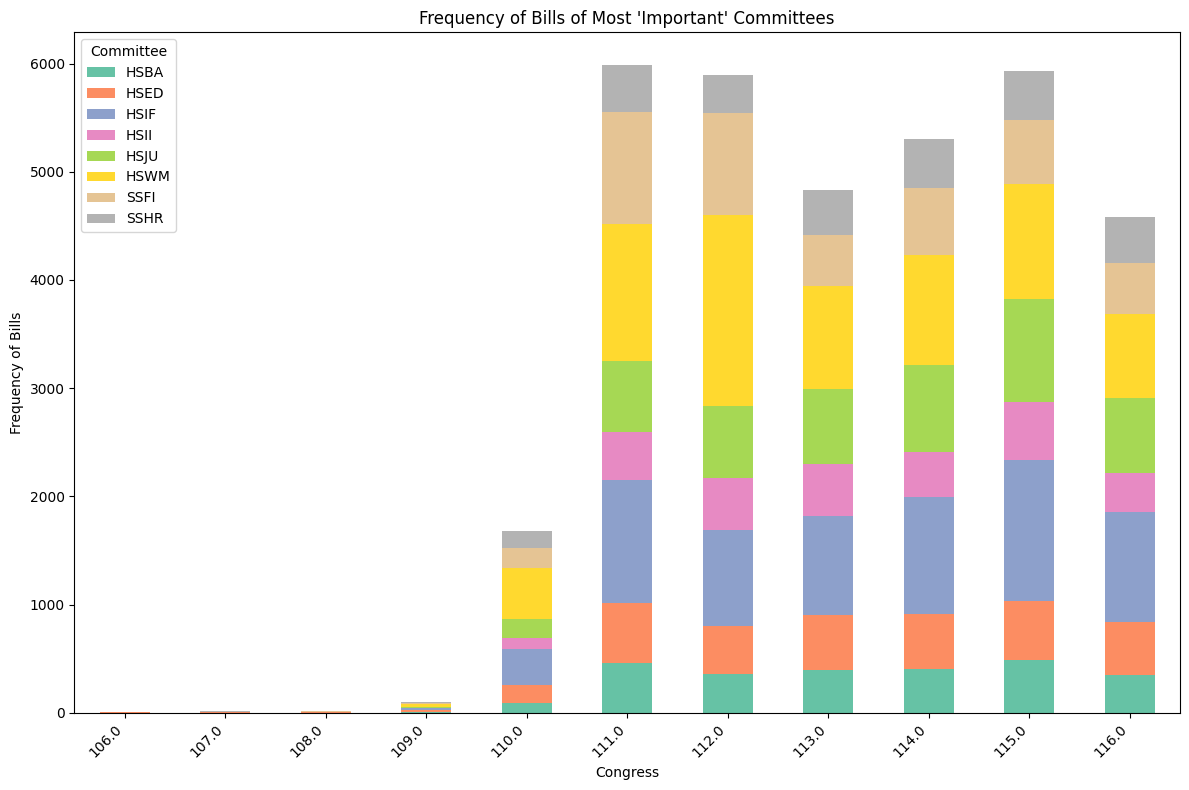

In [28]:

bills_df = pd.read_csv('analyst_csvs/bills.csv')

# dict mapping 'bill_id' to 'congress'
bill_congress_dict = {}

for index, row in bills_df.iterrows():
    bill_id = row['bill_id']
    congress = row['congress']
    bill_congress_dict[bill_id] = congress


# create a dictionary where the keys are the most frequent committee ids
committee_id_congress = {committee_id: [] for committee_id in committee_ids}

# for each committee_id and its bill_ids
for keys, values in committee_id_bill_ids.items():
    # retrieve the congress that the bill is in 
    for value in values:
        congress = bill_congress_dict[value]
        if congress: 
            committee_id_congress.setdefault(keys, []).append(congress)


congress_frequencies = {}

for committee_id, congress_list in committee_id_congress.items():
    # occurrences
    congress_counts = pd.Series(congress_list).value_counts()
    congress_frequencies[committee_id] = congress_counts

# flatten frequencies
flat_frequencies = []

for committee_id, freqs in congress_frequencies.items():
    for congress, count in freqs.items():
        flat_frequencies.append((congress, committee_id, count))

# convert pd.DataFrame 
df_frequencies = pd.DataFrame(flat_frequencies, columns=["Congress", "Committee", "Frequency"])
# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
df_pivoted = df_frequencies.pivot_table(index="Congress", columns="Committee", values="Frequency", aggfunc="sum", fill_value=0)

viz_multi_bar_plot(df_pivoted)


In [30]:
'''
My definition for "importance" is based on the number of bills referred to each committee. 
The more bills, the more "important" that committee is. 

Regardless, using this definition I found that the most "important" committee is the 
House Committee on Ways and Means"

Playing around with the data, I also found that the House of Reps. hold 68.1% of the committees and congress holds 31.9%.

After taking a second glance, I think I focused too much on the frequency of bills. 
While the number of bills is "important", I think what is more "important" is the
amount of money that is lobbied for each bill under the committees. If a committee has a small number 
of bills, 1-2% but an astranomical amount of money is lobbied for those bills, 10%, out of all the lobbied money, 
I think that committee is deemed "important", extremely important. 

My definition of "importance" took me down what I found was the 1st route:
Examine the frequency of bills by the most "important" committees using the congress. 
The vizualization I produced allows for the frequency of bills to be examined throughout the years.
However, it seems like the frequency is normally distributed for all the top committees. 

Using my refined definition of "importance", the 2nd route:
Using the filings.csv, finding the top filings, we can examine the frequency of money spent under different
committees and identify the changes in spending patterns from committee to committee.
Why I didn't think this was significant initially was looking at the data, it looked like the dates were all close in time
but this in rhetrospect is also seen in the committees.  

In retrospect, I would have gone down this route because following the "money" is a little more "important" than just the sheer quanitity of bills. 
I also could have made this process easier by conjoining the filings.csv with the filing_bills.csv, so each filing_uuid has it's bill_id associated with it. 

-- 
The data we have, examines already many aspects of importance. My first hypothesis on defining "importance" for a committee
was based on the frequnecy of bills. In retrospect, I think a stronger definition can be the amount of lobby backed-bills 
in a committee. We can also examine the success rates of each committee based on the bills getting passed or not. We also 
know the general issues covered with issue_codes, the clients, the registrants ..... 

What we don't have is the percentage of poltical difference in the committee. While the *value* of the lobby-backed bills in a committee is important
and the *volume* of bills in the committee is important, what may be more important is how unified the committee's thinking is. At the end of the day,
if a committee can work together to get bills pushed, their success rate for bills being passed in congress, may be higher. Data that can help 
would be a sentiment anaylsis on the committee members' poltical alignment.'''


'\nMy definition for "importance" is based on the number of bills referred to each committee. \nThe more bills, the more "important" that committee is. \n\nRegardless, using this definition I found that the most "important" committee is the \nHouse Committee on Ways and Means"\n\nPlaying around with the data, I also found that the House of Reps. hold 68.1% of the committees and congress holds 31.9%.\n\nAfter taking a second glance, I think I focused too much on the frequency of bills. \nWhile the number of bills is "important", I think what is more "important" is the\namount of money that is lobbied for each bill under the committees. If a committee has a small number \nof bills, 1-2% but an astranomical amount of money is lobbied for those bills, 10%, out of all the lobbied money, \nI think that committee is deemed "important", extremely important. \n\nMy definition of "importance" took me down what I found was the 1st route:\nExamine the frequency of bills by the most "important" com